In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings("ignore")


In [23]:
data = pd.read_csv('/content/IRIS.csv')

In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [26]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Figure size 800x600 with 0 Axes>

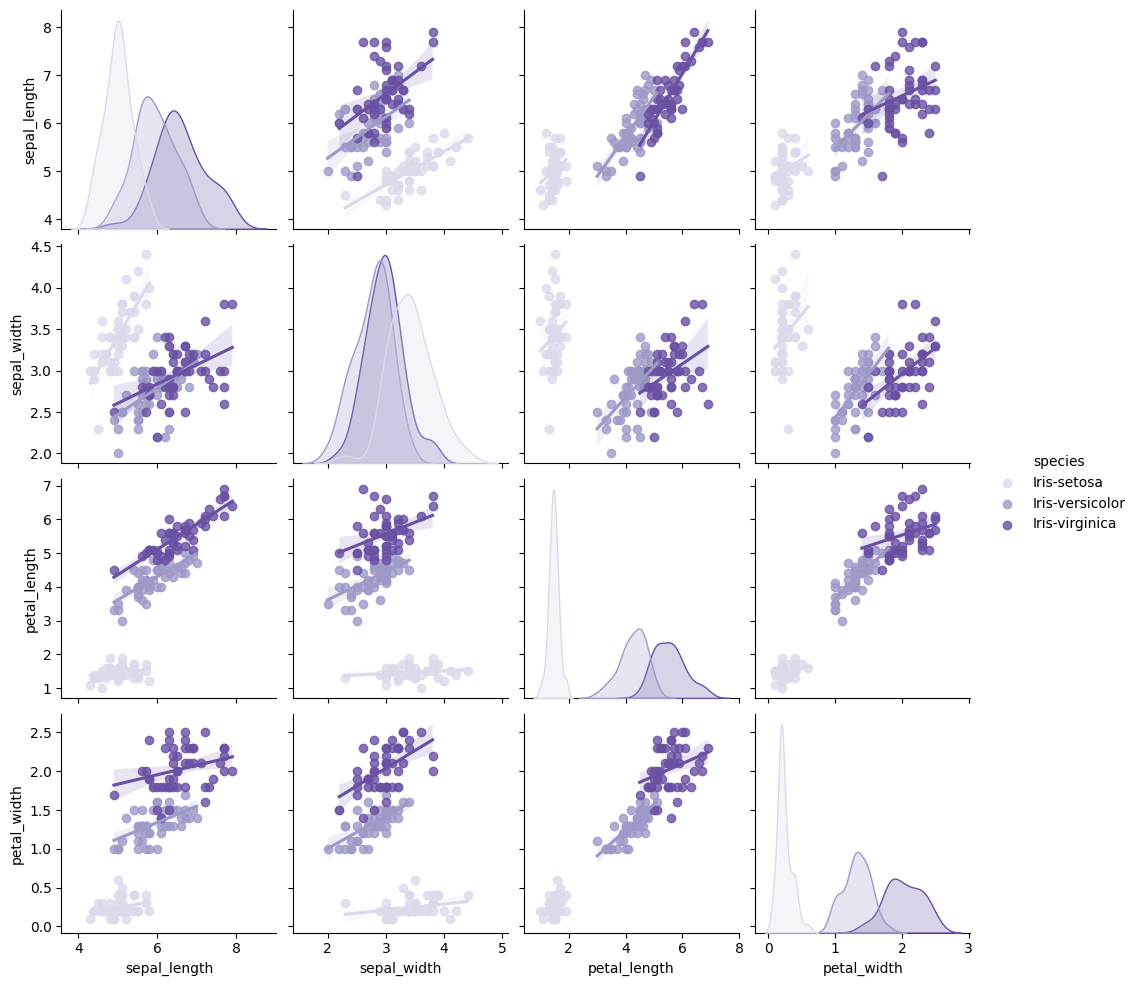

In [34]:
plt.figure(figsize=(8,6));
sns.pairplot(data,kind='reg',hue = 'species',palette= 'Purples' );

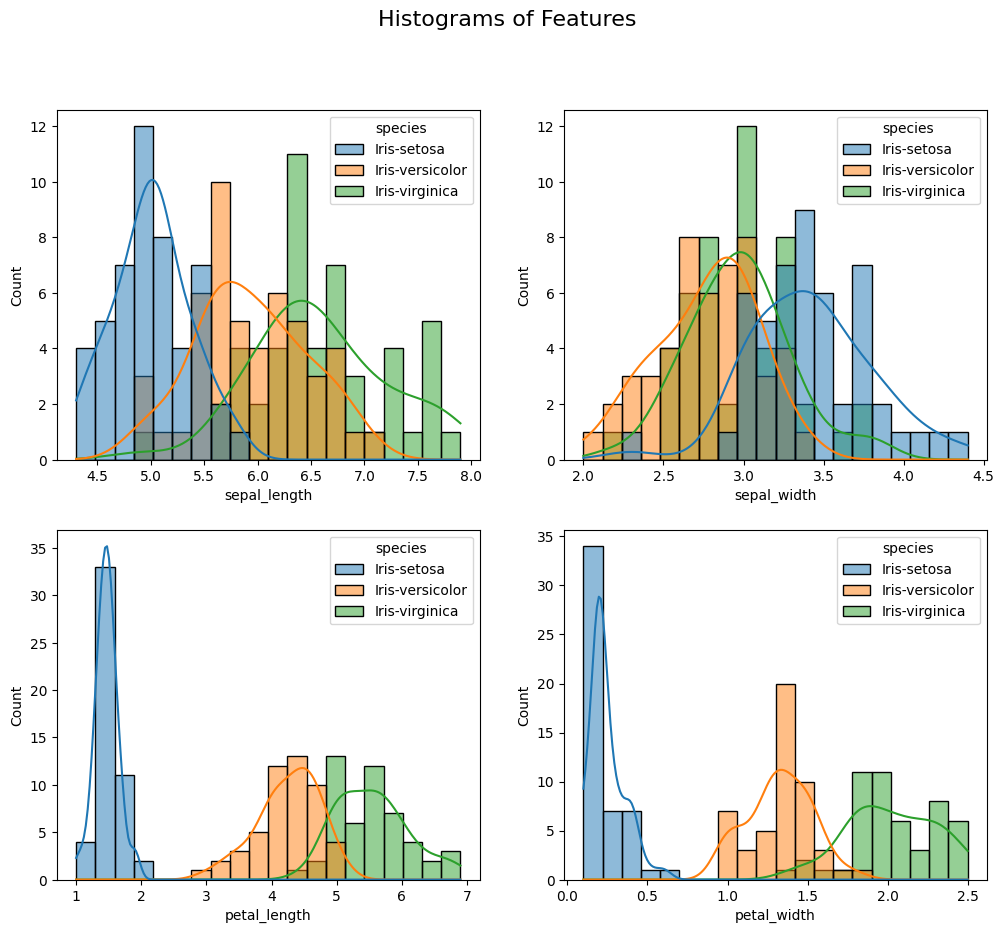

In [35]:
num_columns = list(data.select_dtypes(include=['float']).columns)
num = min(len(num_columns), 2)
fig, ax = plt.subplots(num, num, figsize=(12, 10))
for j in range(num):
    for i in range(num):
        if num_columns:
            sns.histplot(data=data, x=num_columns.pop(0), kde=True, bins=20, hue='species', ax=ax[j][i])
        else:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of Features', fontsize=16)
plt.show()

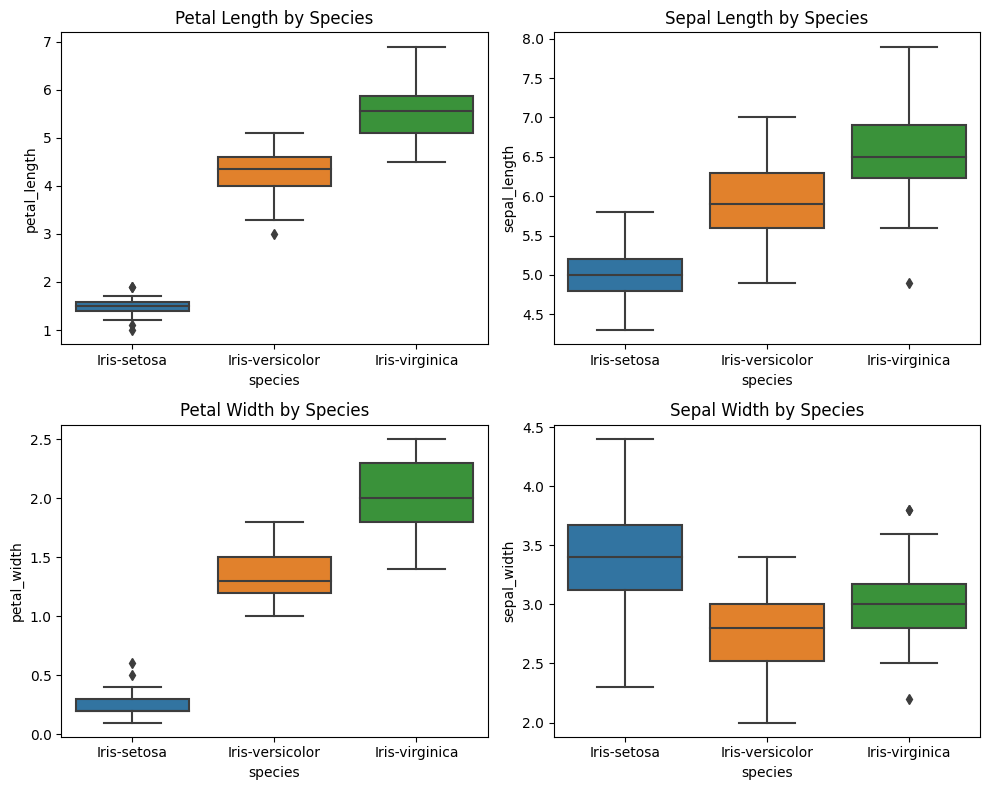

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x="species", y="petal_length", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Petal Length by Species")

sns.boxplot(x="species", y="sepal_length", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Length by Species")

sns.boxplot(x="species", y="petal_width", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Petal Width by Species")

sns.boxplot(x="species", y="sepal_width", data=data, ax=axes[1, 1])
axes[1, 1].set_title("Sepal Width by Species")

plt.tight_layout()
plt.show()

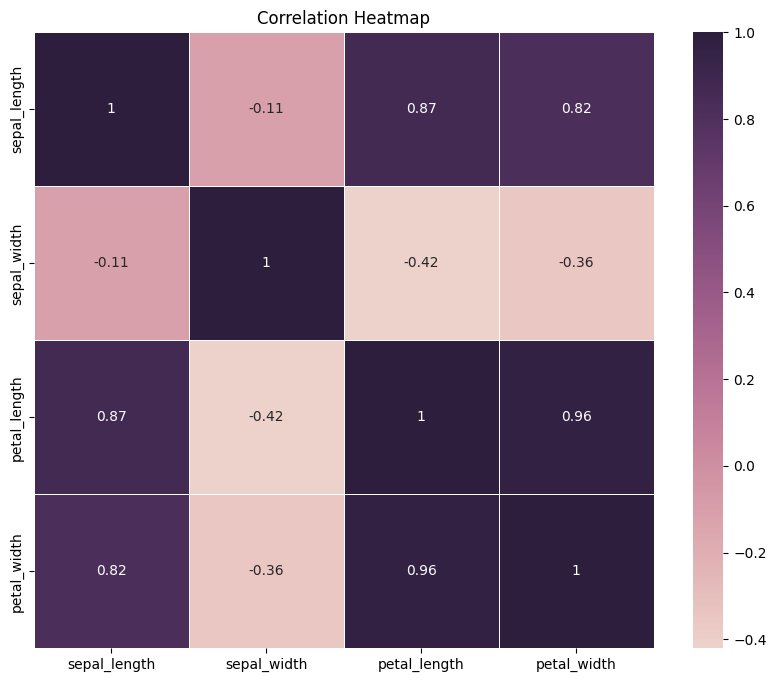

In [39]:
cordata = data.drop(['species'], axis=1)

correlation_matrix = cordata.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

In [42]:
iris_setosa=data.loc[data["species"]=="Iris-setosa"]
iris_virginica=data.loc[data["species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["species"]=="Iris-versicolor"]

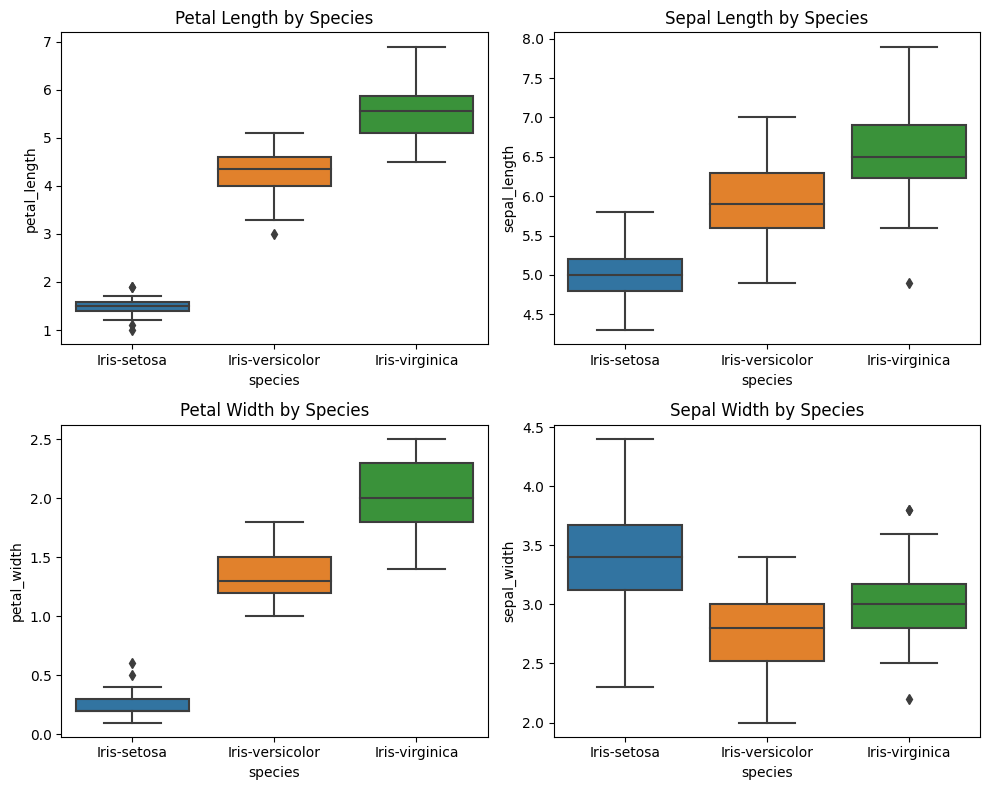

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(x="species", y="petal_length", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Petal Length by Species")

sns.boxplot(x="species", y="sepal_length", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Length by Species")

sns.boxplot(x="species", y="petal_width", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Petal Width by Species")

sns.boxplot(x="species", y="sepal_width", data=data, ax=axes[1, 1])
axes[1, 1].set_title("Sepal Width by Species")

plt.tight_layout()
plt.show()

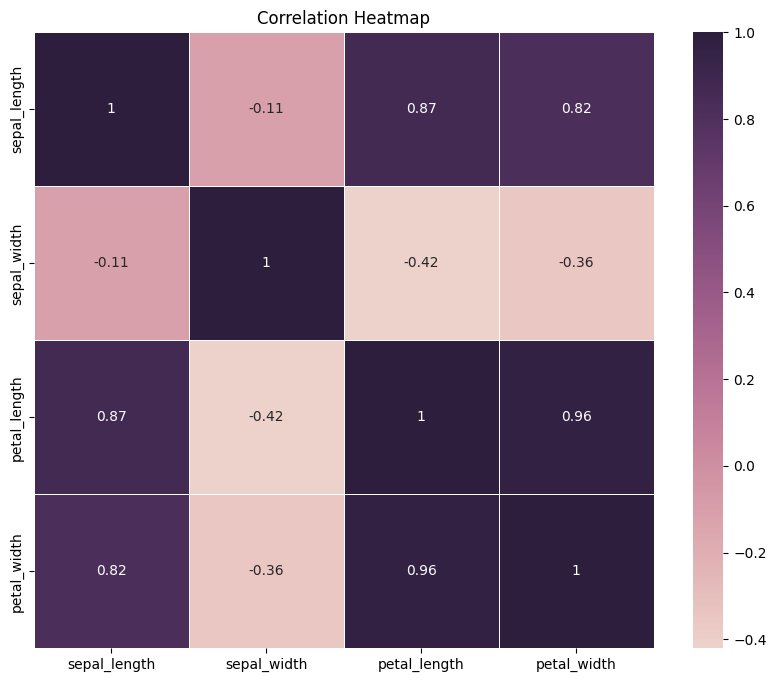

In [44]:
cordata = data.drop(['species'], axis=1)

correlation_matrix = cordata.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

In [45]:

X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Test the KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

In [55]:
print("K-Nearest Neighbors (KNN) Results:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)

K-Nearest Neighbors (KNN) Results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [56]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

In [57]:
print("\nLogistic Regression Results:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)


Logistic Regression Results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

